## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

import statsmodels.api as sm

## Loading Dataset

+ [Kaggle - Campus Recruitment Dataset](https://www.kaggle.com/benroshan/factors-affecting-campus-placement)

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Data Analysis

In [3]:
# removing sl_no column
df.drop(columns=['sl_no'], inplace=True)

In [4]:
# checking distribution range
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
# checking for null values
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
# checking data types
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [7]:
# printing unique values in categorical features
column_names = df.columns
for i, j in enumerate(df.dtypes):
    if(j=='object'):
        print(column_names[i], ':-', df[column_names[i]].unique())

gender :- ['M' 'F']
ssc_b :- ['Others' 'Central']
hsc_b :- ['Others' 'Central']
hsc_s :- ['Commerce' 'Science' 'Arts']
degree_t :- ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex :- ['No' 'Yes']
specialisation :- ['Mkt&HR' 'Mkt&Fin']
status :- ['Placed' 'Not Placed']


## Exploring data by Features

### Feature: Gender

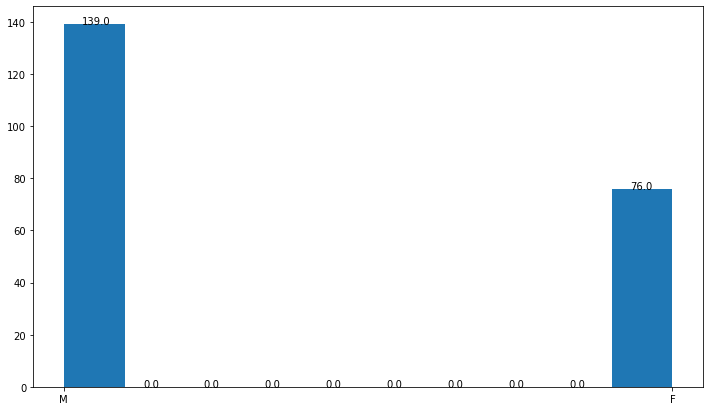

In [8]:
plt.figure(figsize=(12, 7))
counts, bins, _ = plt.hist(df['gender'])

for n, b in zip(counts, bins):
    plt.gca().text(b+0.03, n, str(n))

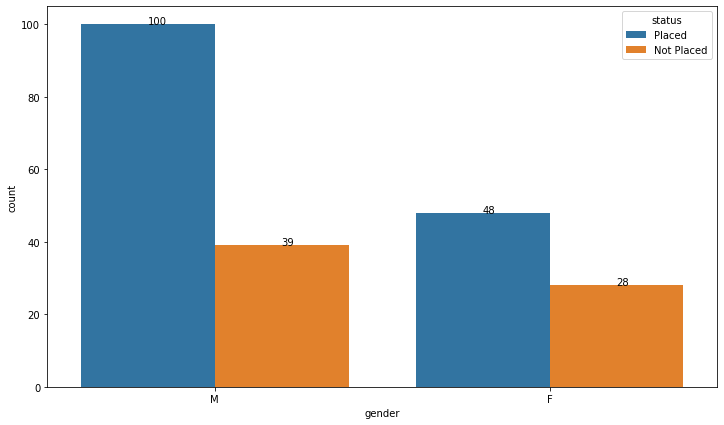

In [9]:
plt.figure(figsize=(12, 7))
ax = sns.countplot("gender", hue="status", data=df)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

Text(0.5, 0, 'Salary (100k)')

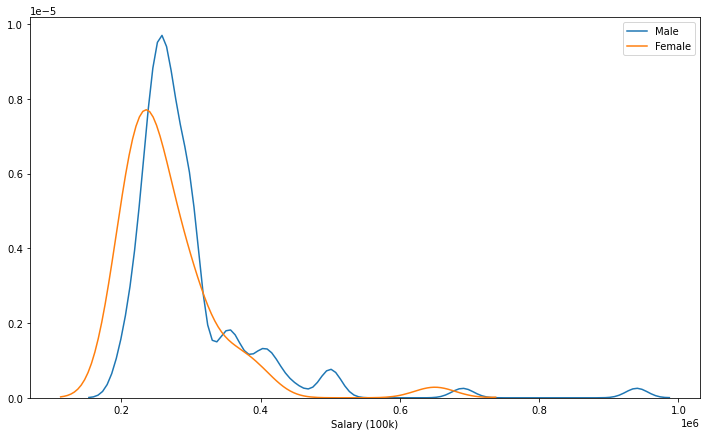

In [10]:
# This plot ignores NaN values for salary, igoring students who are not placed
plt.figure(figsize=(12, 7))
sns.kdeplot(df.salary[df.gender=="M"])
sns.kdeplot(df.salary[df.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")

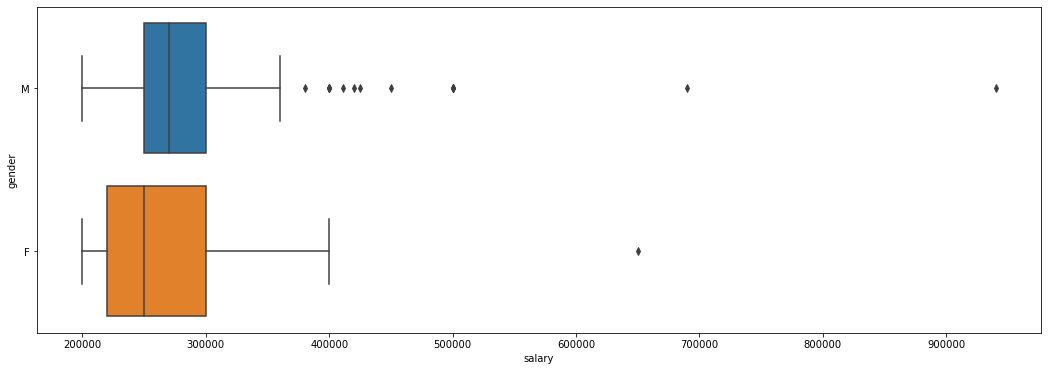

In [11]:
plt.figure(figsize =(18, 6))
sns.boxplot("salary", "gender", data=df)

+ **Insights**
    - We have samples of 139 Male students and 76 Female students.
    - 30 Female and 40 Male students are not placed. Male students have comparatively higher placemets.
    - Male students are offered slightly greater salary than female on an average.

### Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)

Text(0.5, 0, 'Secondary Education Percentage')

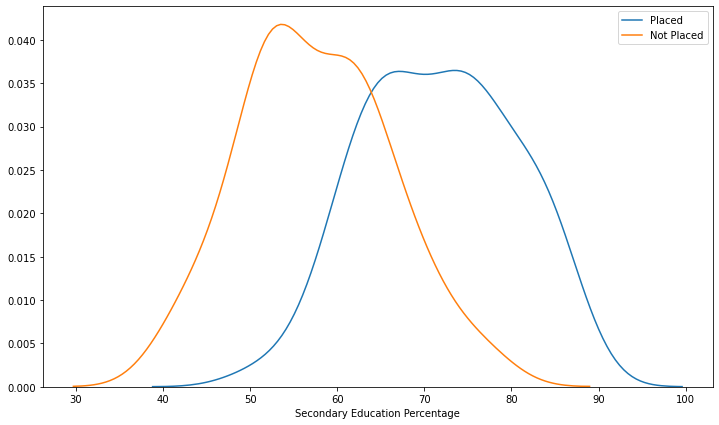

In [12]:
# Kernel-Density Plot
plt.figure(figsize=(12, 7))
sns.kdeplot(df.ssc_p[df.status=="Placed"])
sns.kdeplot(df.ssc_p[df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")

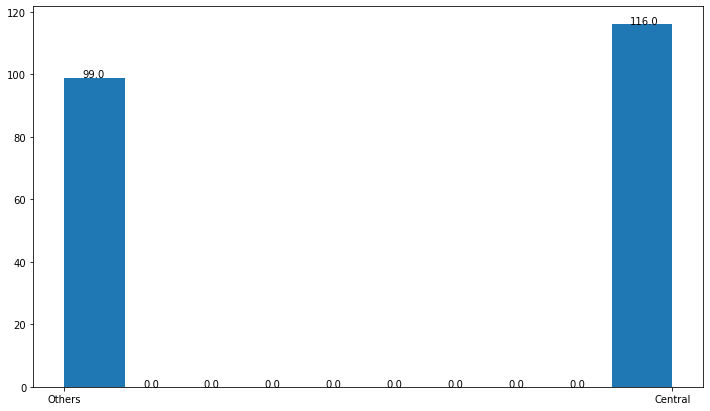

In [13]:
plt.figure(figsize=(12, 7))
counts, bins, _ = plt.hist(df['ssc_b'])

for n, b in zip(counts, bins):
    plt.gca().text(b+0.03, n, str(n))

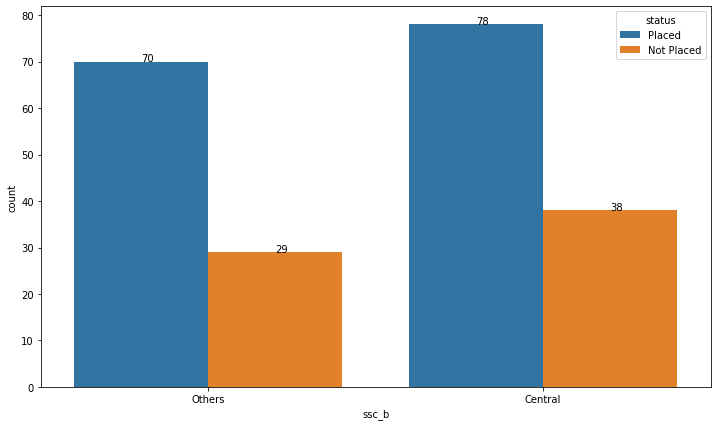

In [14]:
plt.figure(figsize=(12, 7))
ax = sns.countplot("ssc_b", hue="status", data=df)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

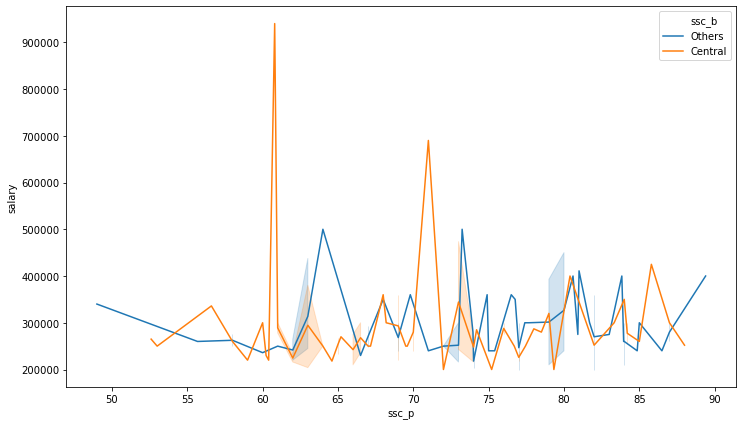

In [15]:
plt.figure(figsize=(12, 7))
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=df)

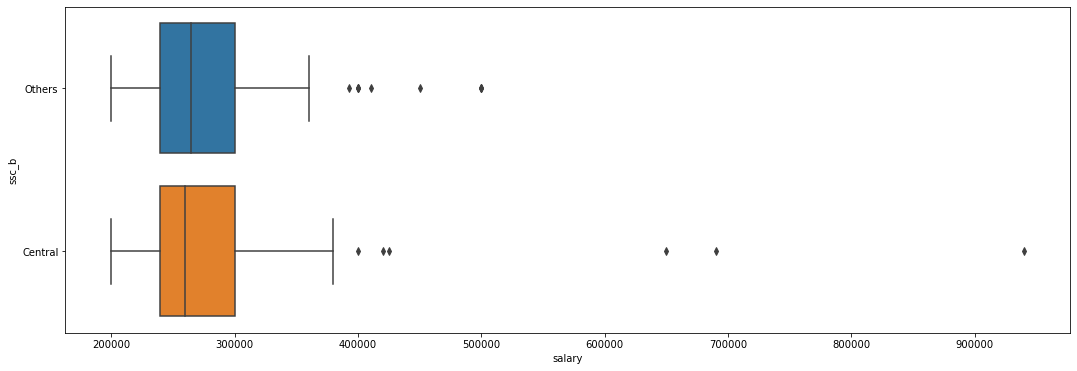

In [16]:
plt.figure(figsize =(18, 6))
sns.boxplot("salary", "ssc_b", data=df)

+ **Insights**
    - We have samples of 116 central students and 99 others students.
    - No specific pattern (correlation) between Secondary Education Percentage and Salary.
    - Board of Education is Not Affecting Salary

### Feature: hsc_p (Higher Secondary Education percentage), hsc_b (Board Of Education), hsc_s (Specialization in Higher Secondary Education)

Text(0.5, 0, 'Higher Secondary Education Percentage')

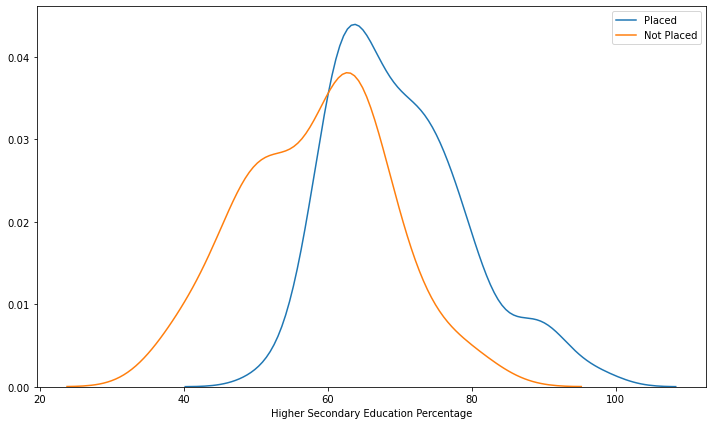

In [17]:
# Kernel-Density Plot
plt.figure(figsize=(12, 7))
sns.kdeplot(df.hsc_p[df.status=="Placed"])
sns.kdeplot(df.hsc_p[df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")

+ Overlap here too. More placements for percentage above 65%
+ Straight drop below 60 in placements -> Perntage must be atleast 60 for chance of being placed

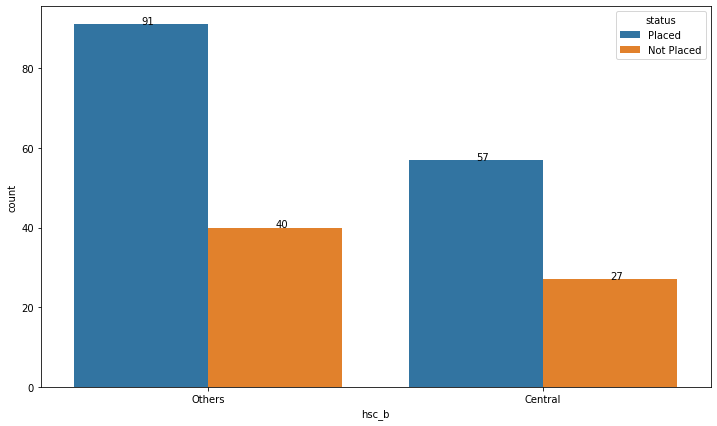

In [18]:
plt.figure(figsize=(12, 7))
ax = sns.countplot("hsc_b", hue="status", data=df)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

+ Education Board again, doesn't affect placement status much

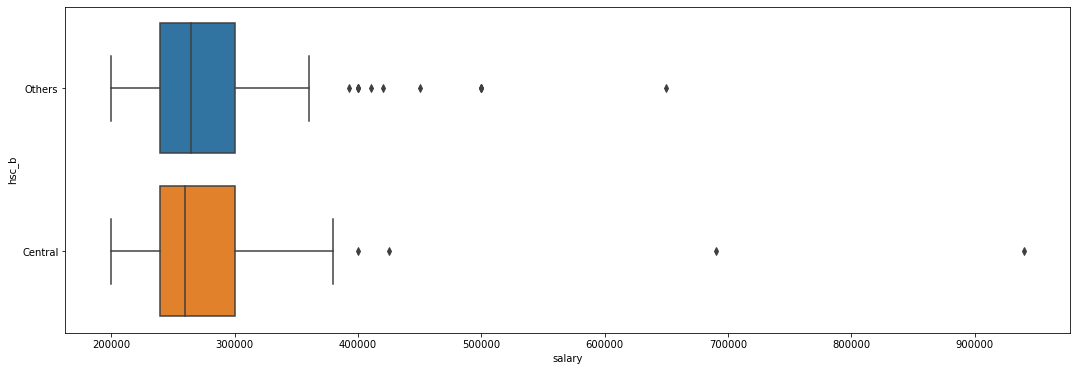

In [19]:
plt.figure(figsize =(18, 6))
sns.boxplot("salary", "hsc_b", data=df)

+ Outliers on both, board doesn't affect getting highly paid jobs. Highest paid job was obtailed by student from Central Board though.

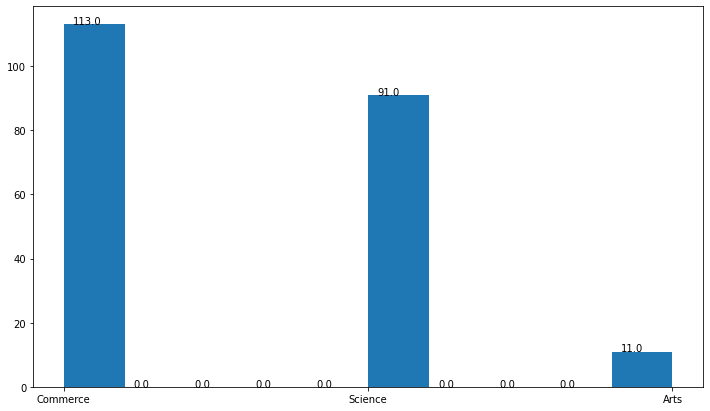

In [20]:
plt.figure(figsize=(12, 7))
counts, bins, _ = plt.hist(df['hsc_s'])

for n, b in zip(counts, bins):
    plt.gca().text(b+0.03, n, str(n))

+ We have samples of 113 Commerce students, 91 Science students and 11 Arts students.

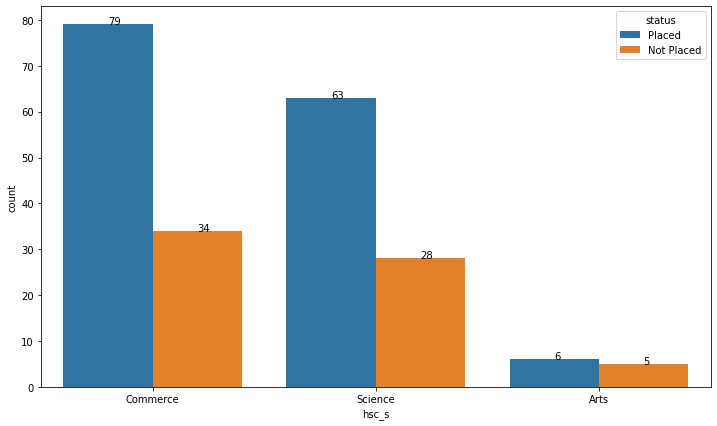

In [21]:
plt.figure(figsize=(12, 7))
ax = sns.countplot("hsc_s", hue="status", data=df)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

+ We have very less students with Arts specialization.
+ Around 2:1 placed:unplaced ratio for both Science and Commerse students

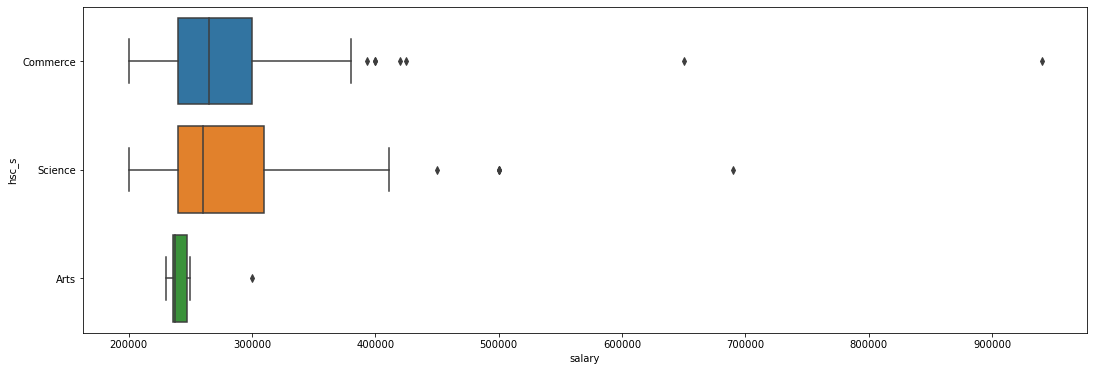

In [22]:
plt.figure(figsize =(18, 6))
sns.boxplot("salary", "hsc_s", data=df)

+ We can't really say for sure due to only few samples of students with Arts Major, but they aren't getting good salaries.
+ Commerse students have slightly better placement status.

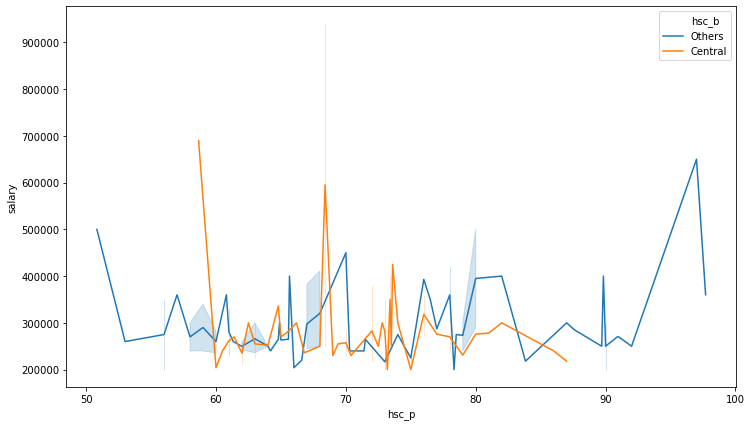

In [23]:
plt.figure(figsize=(12, 7))
sns.lineplot("hsc_p", "salary", hue="hsc_b", data=df)

+ High salary from both Central and Other.
+ High salary for both high and low percentage.
+ Thus, both these feature does not affect salary.

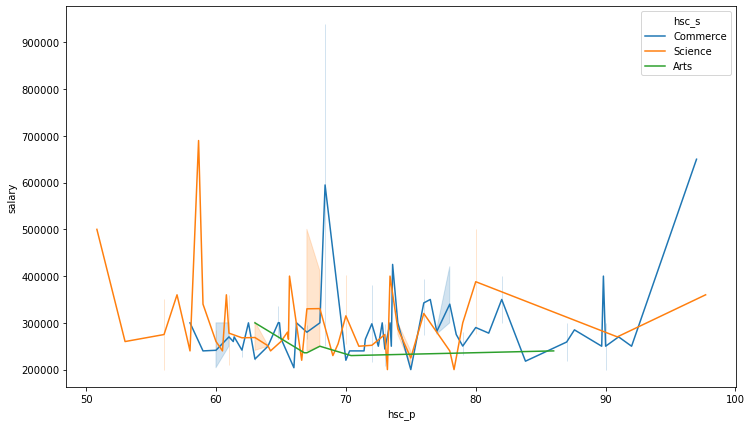

In [24]:
plt.figure(figsize=(12, 7))
sns.lineplot("hsc_p", "salary", hue="hsc_s", data=df)

+ Student with Art Specialization surprisingly have comparatively low salary

### Feature: degree_p (Degree Percentage), degree_t (Under Graduation Degree Field)

Text(0.5, 0, 'Under Graduate Percentage')

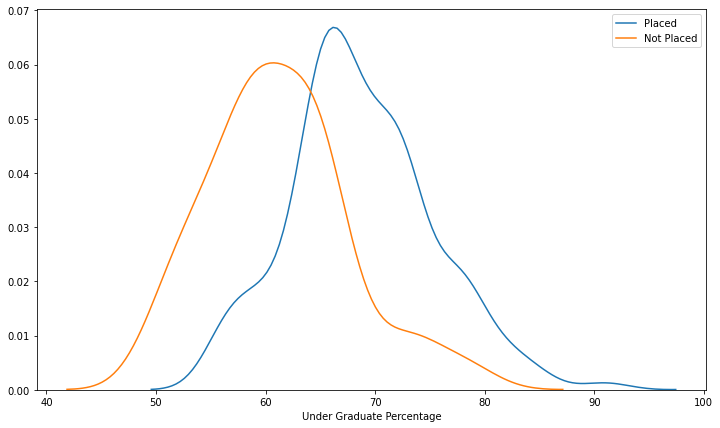

In [25]:
# Kernel-Density Plot
plt.figure(figsize=(12, 7))
sns.kdeplot(df.degree_p[df.status=="Placed"])
sns.kdeplot(df.degree_p[df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")

+ Overlap here too. But More placements for percentage above 65.
+ UG Percentage least 50% to get placement

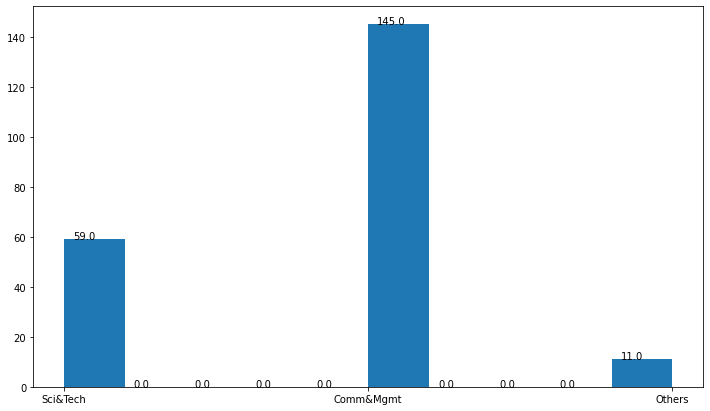

In [26]:
plt.figure(figsize=(12, 7))
counts, bins, _ = plt.hist(df['degree_t'])

for n, b in zip(counts, bins):
    plt.gca().text(b+0.03, n, str(n))

+ We have samples of 59 Sci&Tech students, 145 Comm&Mgmt students and 11 Ohers students.

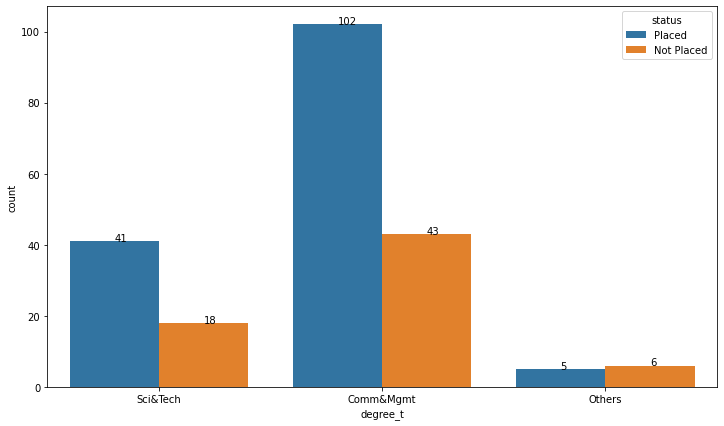

In [27]:
plt.figure(figsize=(12, 7))
ax = sns.countplot("degree_t", hue="status", data=df)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

+ We have very less students with "Other". We cant make decision from few cases.
+ Around 2:1 placed:unplaced ratio for both Science and Commerse students

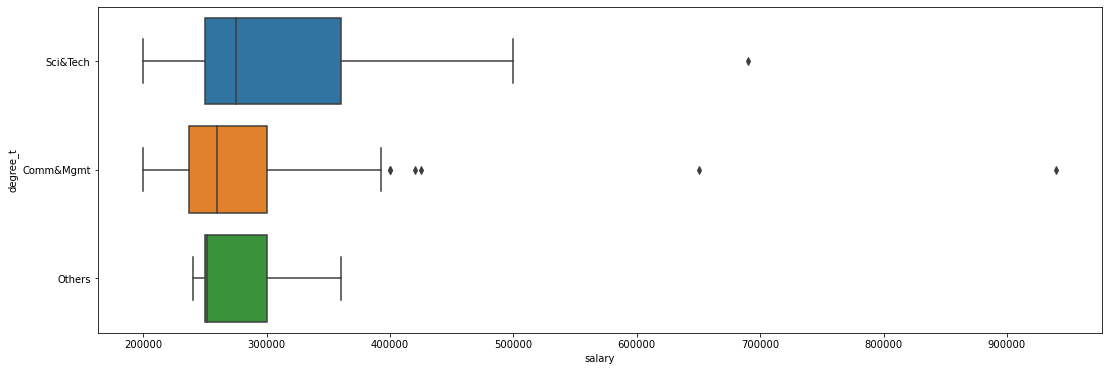

In [28]:
plt.figure(figsize =(18, 6))
sns.boxplot("salary", "degree_t", data=df)

+ Science&Tech students getting more salary on average
+ Management students are getting more highly paid dream jobs.

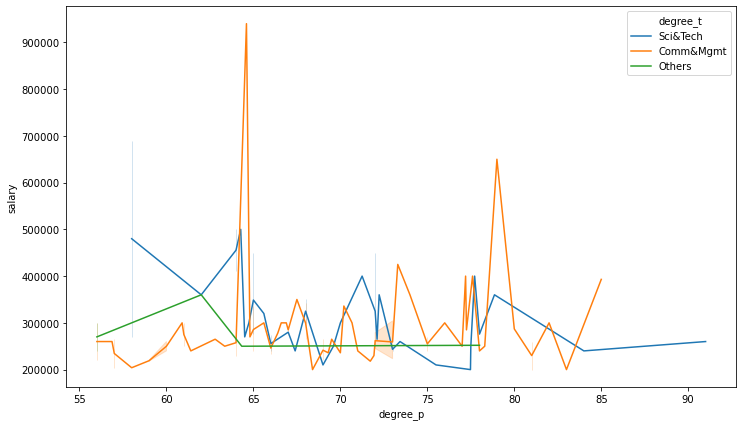

In [29]:
plt.figure(figsize=(12, 7))
sns.lineplot("degree_p", "salary", hue="degree_t", data=df)

+ Percentage does not seem to affect salary.
+ Commerce&Mgmt students occasionally get dream placements with high salary

### Feature: workex (Work Experience)

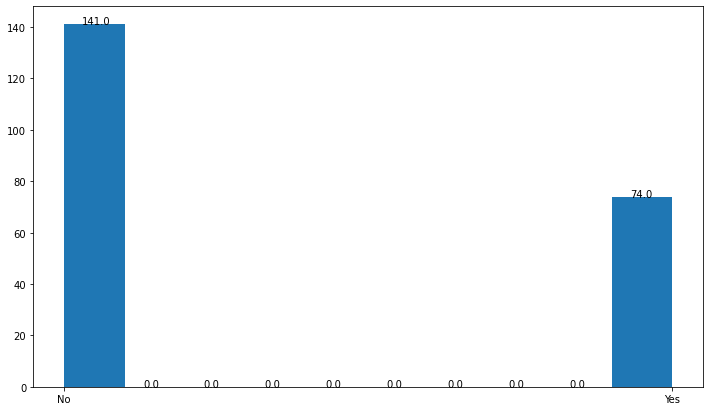

In [30]:
plt.figure(figsize=(12, 7))
counts, bins, _ = plt.hist(df['workex'])

for n, b in zip(counts, bins):
    plt.gca().text(b+0.03, n, str(n))

+ We have samples of 141 students without work experience and 74 students with work experience.

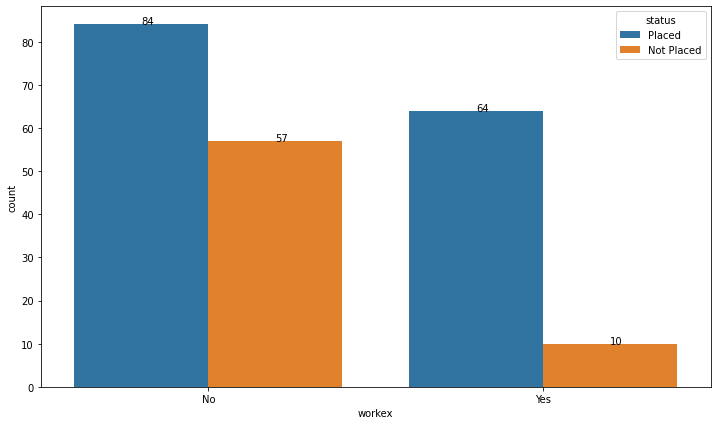

In [31]:
plt.figure(figsize=(12, 7))
ax = sns.countplot("workex", hue="status", data=df)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

+ This affects Placement. Very few students with work experience not getting placed!

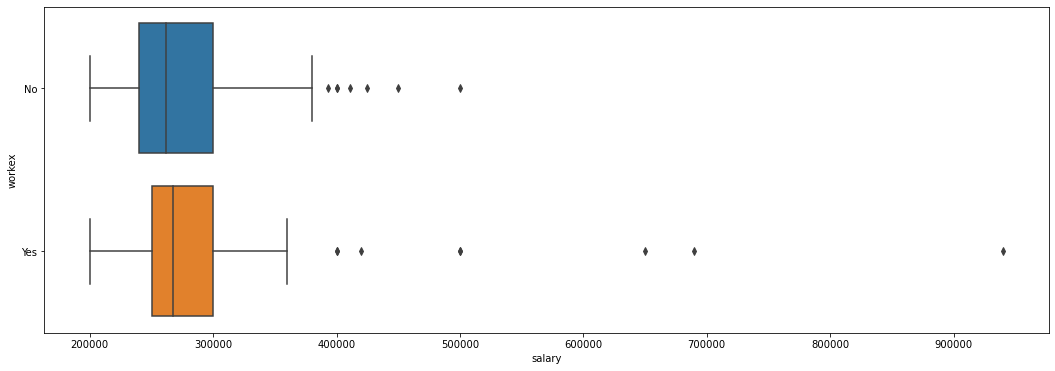

In [32]:
plt.figure(figsize =(18, 6))
sns.boxplot("salary", "workex", data=df)

+ Outliers (High salary than average) on bith end but students with experience getting dream jobs
+ Average salary as well as base salary high for students with work experience.

### Feature: etest_p (Employability test percentage)

Text(0.5, 0, 'Employability test percentage')

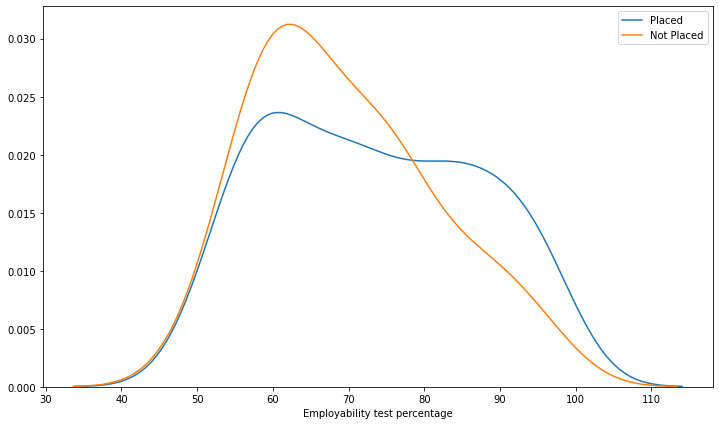

In [33]:
# Kernel-Density Plot
plt.figure(figsize=(12, 7))
sns.kdeplot(df.etest_p[df.status=="Placed"])
sns.kdeplot(df.etest_p[df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")

+ High overlap -> It does not affect placement status much
+ More "Not Placed" on percentage 50-70 range and more placed on 80% percentage range

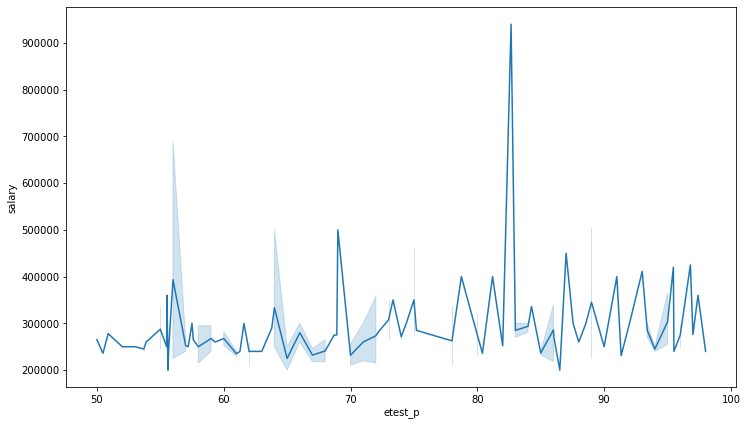

In [34]:
plt.figure(figsize=(12, 7))
sns.lineplot("etest_p", "salary", data=df)

+ This feature surprisingly does not affect placements and salary much

### Feature: specialisation (Post Graduate Specialization)

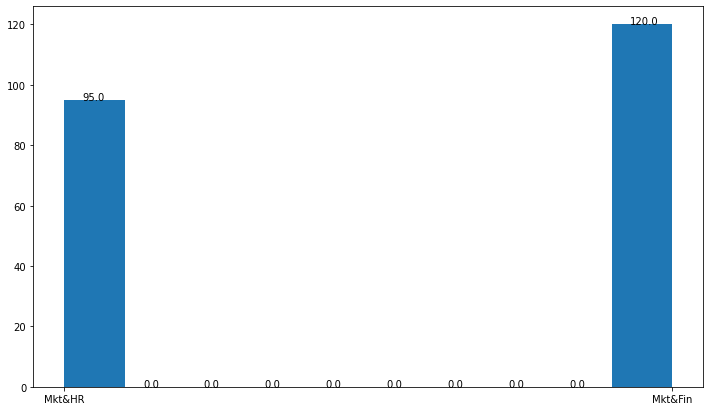

In [35]:
plt.figure(figsize=(12, 7))
counts, bins, _ = plt.hist(df['specialisation'])

for n, b in zip(counts, bins):
    plt.gca().text(b+0.03, n, str(n))

+ We have samples of 95 students and 120 students specialized in Mkt&HR and Mkt&Fin.

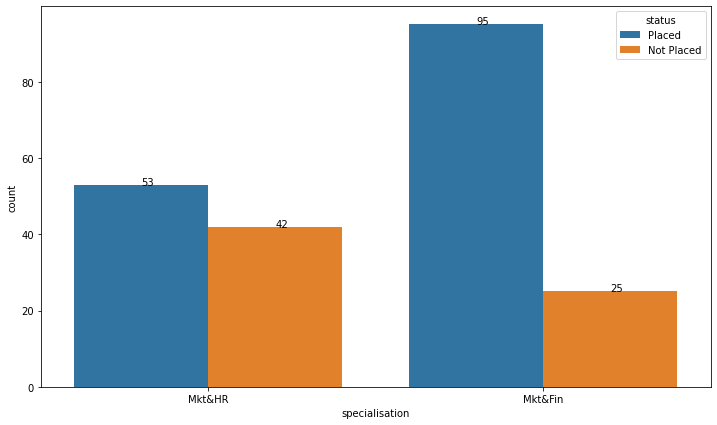

In [36]:
plt.figure(figsize=(12, 7))
ax = sns.countplot("specialisation", hue="status", data=df)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

+ This feature affects Placement status.
+ Comparitively very low not-placed students in Mkt&Fin Section

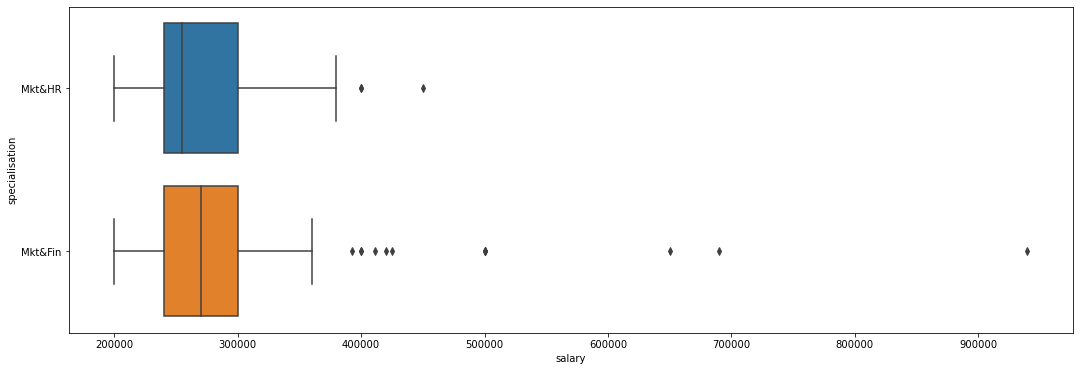

In [37]:
plt.figure(figsize =(18, 6))
sns.boxplot("salary", "specialisation", data=df)

+ More Highly Paid Jobs for Mkt&Fin students

### Feature: mba_p (MBA percentage)

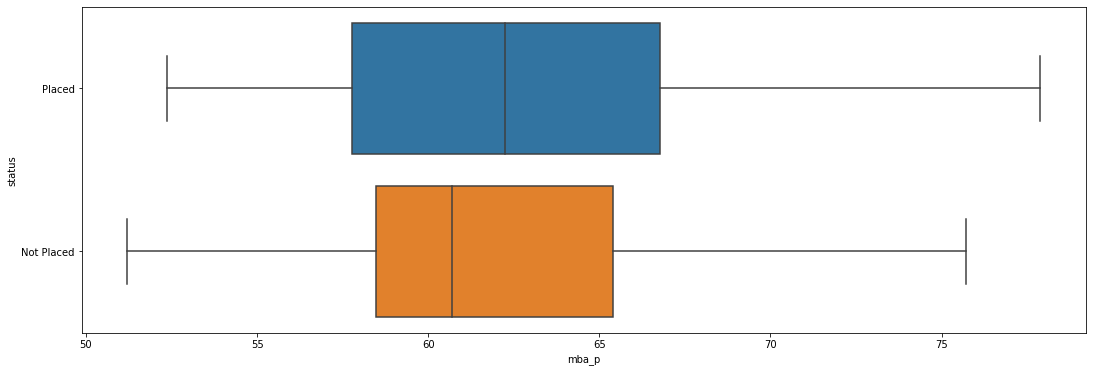

In [38]:
plt.figure(figsize =(18, 6))
sns.boxplot("mba_p", "status", data=df)

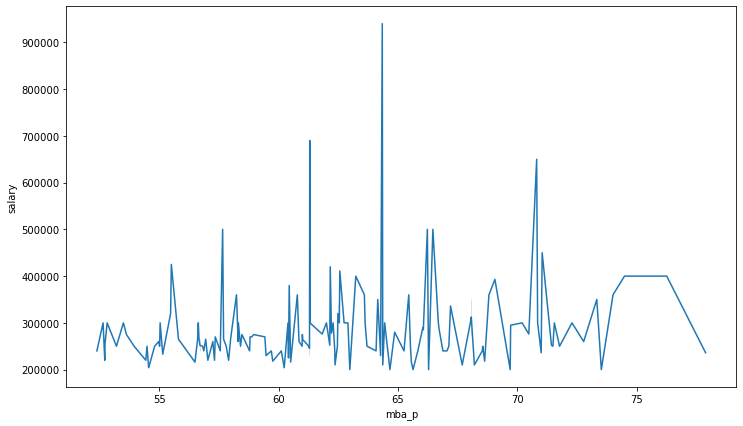

In [39]:
plt.figure(figsize=(12, 7))
sns.lineplot("mba_p", "salary", data=df)

+ MBA Percentage also does not affect salary much

## Feature Selection

Using Only following features (Ignoring Board of Education -> they didnt seem to have much effect)
* Gender
* Secondary Education percentage
* Higher Secondary Education Percentsge
* Specialization in Higher Secondary Education
* Under Graduate Dergree Percentage
* Under Graduation Degree Field
* Work Experience
* Employability test percentage
* Specialization
* MBA Percentage

In [40]:
df.drop(columns=['ssc_b', 'hsc_b'], inplace=True)

## Feature Encoding

In [41]:
df["gender"] = df.gender.map({"M":0, "F":1})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["status"] = df.status.map({"Not Placed":0, "Placed":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

In [42]:
df

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,0,58.80,1,270000.0
1,0,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,1,66.28,1,200000.0
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,1,57.80,1,250000.0
3,0,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,0,59.43,0,NaN
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,1,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,Commerce,77.60,Comm&Mgmt,0,91.0,1,74.49,1,400000.0
211,0,58.00,60.00,Science,72.00,Sci&Tech,0,74.0,1,53.62,1,275000.0
212,0,67.00,67.00,Commerce,73.00,Comm&Mgmt,1,59.0,1,69.72,1,295000.0
213,1,74.00,66.00,Commerce,58.00,Comm&Mgmt,0,70.0,0,60.23,1,204000.0


In [43]:
hsc_s = pd.get_dummies(df['hsc_s'])
hsc_s

,Arts,Commerce,Science
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
210,0,1,0
211,0,0,1
212,0,1,0
213,0,1,0


In [44]:
degree_t = pd.get_dummies(df['degree_t'])
degree_t

,Comm&Mgmt,Others,Sci&Tech
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
210,1,0,0
211,0,0,1
212,1,0,0
213,1,0,0


In [45]:
# ignoring 'Arts' from hsc_s & 'others' from degree_t
df.drop(columns=['hsc_s', 'degree_t'], inplace=True)
df = pd.concat([hsc_s.iloc[:, 1:], degree_t.iloc[:, [0, 2]], df], axis=1)
df

,Commerce,Science,Comm&Mgmt,Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1,270000.0
1,0,1,0,1,0,79.33,78.33,77.48,1,86.5,1,66.28,1,200000.0
2,0,0,1,0,0,65.00,68.00,64.00,0,75.0,1,57.80,1,250000.0
3,0,1,0,1,0,56.00,52.00,52.00,0,66.0,0,59.43,0,NaN
4,1,0,1,0,0,85.80,73.60,73.30,0,96.8,1,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,1,0,0,80.60,82.00,77.60,0,91.0,1,74.49,1,400000.0
211,0,1,0,1,0,58.00,60.00,72.00,0,74.0,1,53.62,1,275000.0
212,1,0,1,0,0,67.00,67.00,73.00,1,59.0,1,69.72,1,295000.0
213,1,0,1,0,1,74.00,66.00,58.00,0,70.0,0,60.23,1,204000.0


## Predicting if students gets placed or not (Binary Classification Problem)

### Dropping salary column

In [46]:
data1 = df.copy()
data1.drop(columns=['salary'], inplace=True)
data1

,Commerce,Science,Comm&Mgmt,Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,0,1,0,1,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,0,0,1,0,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,0,1,0,1,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,1,0,1,0,0,85.80,73.60,73.30,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,1,0,0,80.60,82.00,77.60,0,91.0,1,74.49,1
211,0,1,0,1,0,58.00,60.00,72.00,0,74.0,1,53.62,1
212,1,0,1,0,0,67.00,67.00,73.00,1,59.0,1,69.72,1
213,1,0,1,0,1,74.00,66.00,58.00,0,70.0,0,60.23,1


### Splitting dataframe into dependent & independent variables

In [47]:
X1 = data1.iloc[:, :-1].values
Y1 = data1.iloc[:, -1:].values

### Splitting into training & test sets

In [48]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, shuffle=True)

### Normailization

In [49]:
scaler_X1 = MinMaxScaler()
X1_train = scaler_X1.fit_transform(X1_train)
X1_test = scaler_X1.transform(X1_test)

In [50]:
pd.DataFrame(pd.concat([pd.DataFrame(data=X1_train, columns=data1.columns[:-1]), pd.DataFrame(data=Y1_train, columns=data1.columns[-1:])], axis=1))

,Commerce,Science,Comm&Mgmt,Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1.0,0.0,1.0,0.0,0.0,0.455782,0.411862,0.439024,0.0,0.291667,1.0,0.419925,1
1,0.0,1.0,0.0,1.0,0.0,0.620697,0.356837,0.195122,1.0,0.125000,1.0,0.376316,1
2,1.0,0.0,1.0,0.0,0.0,0.527932,0.420099,0.265854,0.0,0.904167,1.0,0.140602,1
3,1.0,0.0,1.0,0.0,0.0,0.758194,0.459473,0.504146,0.0,0.812500,1.0,0.342105,1
4,1.0,0.0,1.0,0.0,1.0,0.476397,0.601318,0.560976,0.0,0.041667,0.0,0.203383,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1.0,0.0,1.0,0.0,1.0,0.084725,0.329489,0.195122,1.0,0.133125,0.0,0.513534,0
189,1.0,0.0,1.0,0.0,0.0,0.323851,0.457990,0.492683,0.0,0.713958,1.0,0.598120,1
190,1.0,0.0,1.0,0.0,0.0,0.455782,0.576606,0.439024,0.0,0.583333,0.0,0.343985,1
191,1.0,0.0,1.0,0.0,0.0,0.455782,0.566722,0.278049,0.0,0.375000,1.0,0.586090,1


## Dimension Reduction

In [51]:
# dimension reduction: useful for plotting
pca1 = PCA(n_components=2)
Xp2_train = pca1.fit_transform(X1_train)
Xp2_test = pca1.transform(X1_test)
print(pca1.explained_variance_ratio_)

[0.39968699 0.16426418]


### Training Models

#### Decision-Tree Classifier

In [52]:
classifier1 = DecisionTreeClassifier(criterion='gini', splitter='best')
classifier1.fit(X=X1_train, y=Y1_train)
Y1_pred1 = classifier1.predict(X=X1_test)

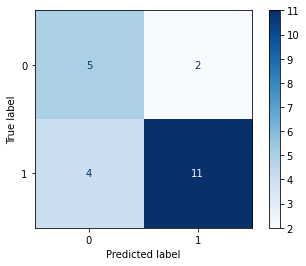

In [53]:
plot_confusion_matrix(estimator=classifier1, X=X1_test, y_true=Y1_test, include_values=True, cmap=plt.cm.Blues)

In [54]:
accuracy_score(y_true=Y1_test, y_pred=Y1_pred1, normalize=True)

0.7272727272727273

In [55]:
print(classification_report(y_true=Y1_test, y_pred=Y1_pred1))

              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.85      0.73      0.79        15

    accuracy                           0.73        22
   macro avg       0.70      0.72      0.71        22
weighted avg       0.75      0.73      0.73        22



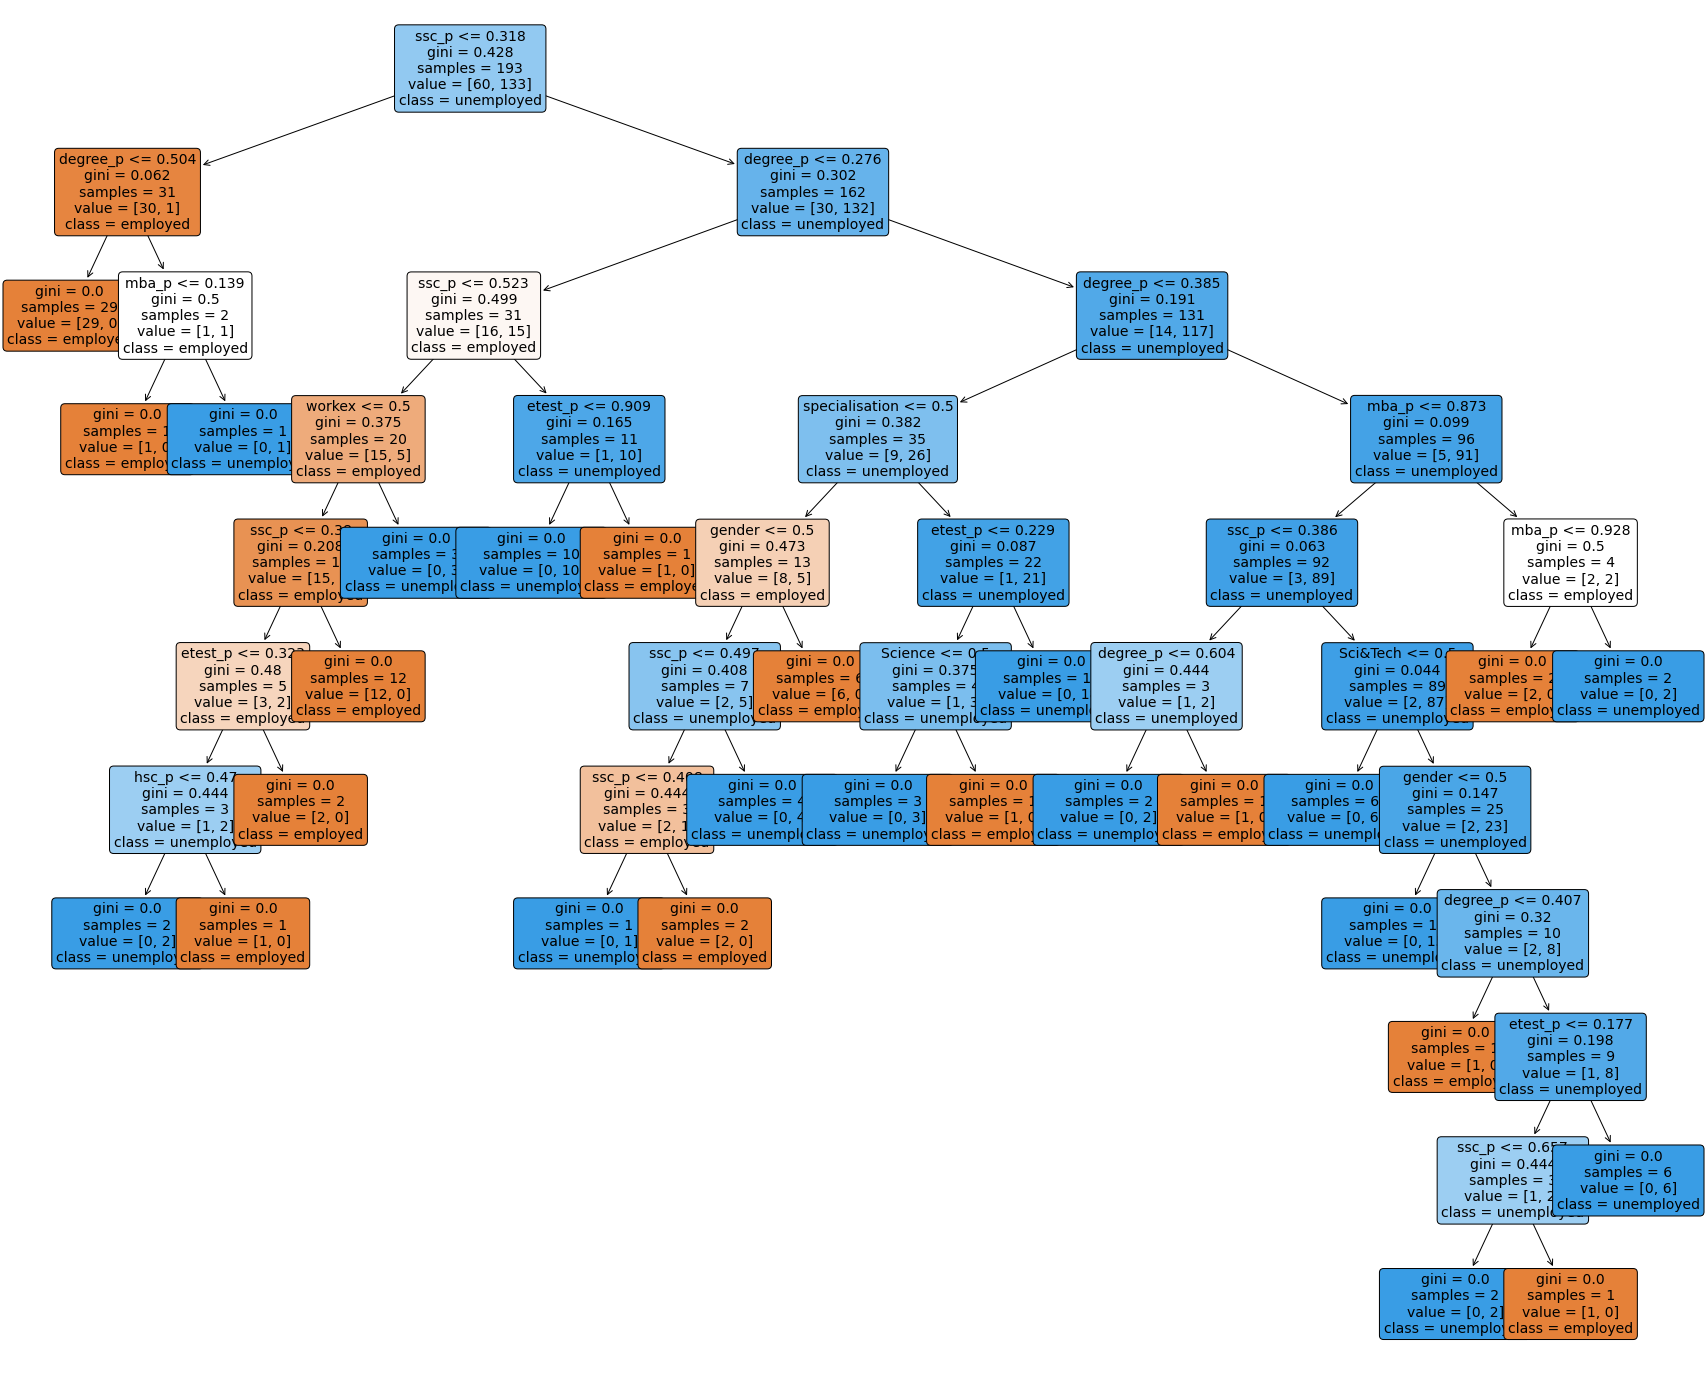

In [56]:
plt.figure(figsize=(30, 25))
tree1 = plot_tree(decision_tree=classifier1, feature_names=data1.columns[:-1], class_names=['employed', 'unemployed'], filled=True, rounded=True, fontsize=14)

Text(0, 0.5, 'PCA2')

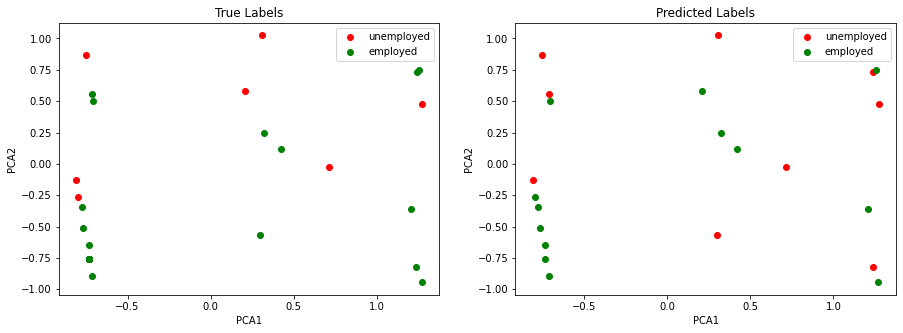

In [57]:
plt.figure(figsize=(15, 5))
cdict = {0:'unemployed', 1:'employed'}
color = {0:'red', 1:'green'}


ax = plt.subplot(1, 2, 1)
for g in np.unique(list(cdict.keys())):
    ix = np.where(Y1_test==g)
    ax.scatter(x=Xp2_test[ix, 0], y=Xp2_test[ix, 1], c=color[g], label=cdict[g])
ax.legend()
plt.title('True Labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')


ax = plt.subplot(1, 2, 2)
for g in np.unique(list(cdict.keys())):
    ix = np.where(Y1_pred1==g)
    ax.scatter(x=Xp2_test[ix, 0], y=Xp2_test[ix, 1], c=color[g], label=cdict[g])
ax.legend()
plt.title('Predicted Labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

#### Random-Forest Classifier

In [58]:
classifier2 = RandomForestClassifier(n_estimators=200, criterion='gini', n_jobs=-1)
classifier2.fit(X1_train, np.ravel(Y1_train))
Y1_pred2 = classifier2.predict(X1_test)

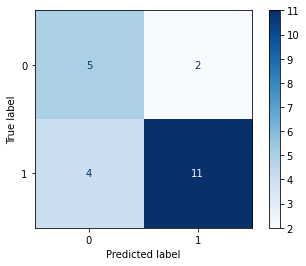

In [59]:
plot_confusion_matrix(estimator=classifier2, X=X1_test, y_true=Y1_test, include_values=True, cmap=plt.cm.Blues)

In [60]:
accuracy_score(Y1_test, Y1_pred2)

0.7272727272727273

In [61]:
print(classification_report(Y1_test, Y1_pred2))

              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.85      0.73      0.79        15

    accuracy                           0.73        22
   macro avg       0.70      0.72      0.71        22
weighted avg       0.75      0.73      0.73        22



Text(0, 0.5, 'PCA2')

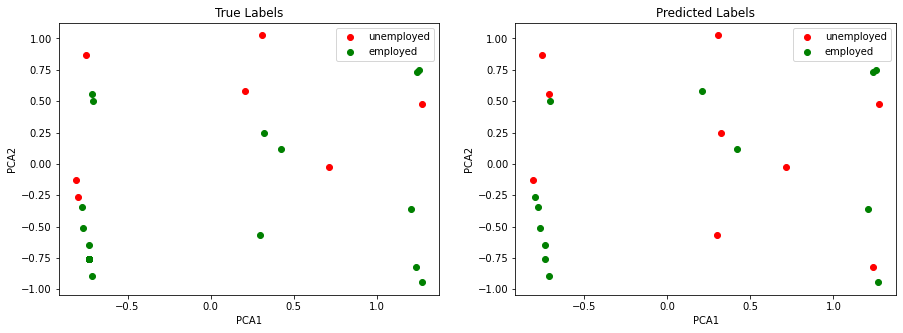

In [62]:
plt.figure(figsize=(15, 5))
cdict = {0:'unemployed', 1:'employed'}
color = {0:'red', 1:'green'}


ax = plt.subplot(1, 2, 1)
for g in np.unique(list(cdict.keys())):
    ix = np.where(Y1_test==g)
    ax.scatter(x=Xp2_test[ix, 0], y=Xp2_test[ix, 1], c=color[g], label=cdict[g])
ax.legend()
plt.title('True Labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')


ax = plt.subplot(1, 2, 2)
for g in np.unique(list(cdict.keys())):
    ix = np.where(Y1_pred2==g)
    ax.scatter(x=Xp2_test[ix, 0], y=Xp2_test[ix, 1], c=color[g], label=cdict[g])
ax.legend()
plt.title('Predicted Labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

## Predicting salary of student (Regression Problem)

### Handling status column

In [63]:
# making a copy of dataset
data2 = df.copy()

# dropping unemployed status
data2 = data2[data2['status']==1]
data2

,Commerce,Science,Comm&Mgmt,Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1,270000.0
1,0,1,0,1,0,79.33,78.33,77.48,1,86.5,1,66.28,1,200000.0
2,0,0,1,0,0,65.00,68.00,64.00,0,75.0,1,57.80,1,250000.0
4,1,0,1,0,0,85.80,73.60,73.30,0,96.8,1,55.50,1,425000.0
7,0,1,0,1,0,82.00,64.00,66.00,1,67.0,1,62.14,1,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,0,1,0,0,62.00,72.00,65.00,0,67.0,1,56.49,1,216000.0
210,1,0,1,0,0,80.60,82.00,77.60,0,91.0,1,74.49,1,400000.0
211,0,1,0,1,0,58.00,60.00,72.00,0,74.0,1,53.62,1,275000.0
212,1,0,1,0,0,67.00,67.00,73.00,1,59.0,1,69.72,1,295000.0


In [64]:
data2.drop(columns=['status'], inplace=True)

### Handling missing values

In [65]:
# no need to handle as there are none
data2['salary'].isnull().sum()

0

### Removing Outliers

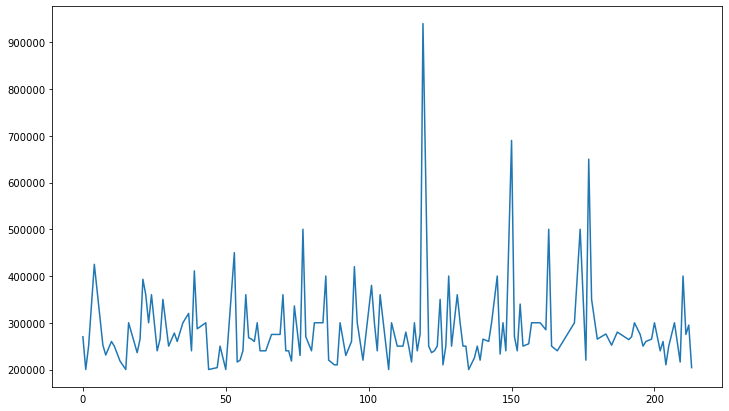

In [66]:
plt.figure(figsize=(12, 7))
plt.plot(data2['salary'])

In [67]:
# removing them
data2['salary'][data2['salary']>500000]

119    940000.0
150    690000.0
177    650000.0
Name: salary, dtype: float64

In [68]:
data2 = data2[data2['salary']<500000]
data2

,Commerce,Science,Comm&Mgmt,Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,salary
0,1,0,0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,270000.0
1,0,1,0,1,0,79.33,78.33,77.48,1,86.5,1,66.28,200000.0
2,0,0,1,0,0,65.00,68.00,64.00,0,75.0,1,57.80,250000.0
4,1,0,1,0,0,85.80,73.60,73.30,0,96.8,1,55.50,425000.0
7,0,1,0,1,0,82.00,64.00,66.00,1,67.0,1,62.14,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,0,1,0,0,62.00,72.00,65.00,0,67.0,1,56.49,216000.0
210,1,0,1,0,0,80.60,82.00,77.60,0,91.0,1,74.49,400000.0
211,0,1,0,1,0,58.00,60.00,72.00,0,74.0,1,53.62,275000.0
212,1,0,1,0,0,67.00,67.00,73.00,1,59.0,1,69.72,295000.0


### Splitting dataframe into dependent & independent variables

In [69]:
X2 = data2.iloc[:, :-1].values
Y2 = data2.iloc[:, -1:].values

### Splitting into training & test sets

In [70]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.1, shuffle=True)

### Normailization

In [71]:
scaler_X2 = MinMaxScaler()
X2_train = scaler_X2.fit_transform(X2_train)
X2_test = scaler_X2.transform(X2_test)

scaler_Y2 = MinMaxScaler()
Y2_train = scaler_Y2.fit_transform(Y2_train)
Y2_test = scaler_Y2.transform(Y2_test)

In [72]:
pd.DataFrame(pd.concat([pd.DataFrame(data=X2_train, columns=data2.columns[:-1]), pd.DataFrame(data=Y2_train, columns=data2.columns[-1:])], axis=1))

,Commerce,Science,Comm&Mgmt,Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,salary
0,1.0,0.0,1.0,0.0,1.0,0.742574,0.514541,0.828571,0.0,0.937500,1.0,0.653861,0.772
1,0.0,0.0,0.0,0.0,1.0,0.272277,0.223714,0.000000,1.0,0.625000,0.0,0.166601,0.400
2,1.0,0.0,1.0,0.0,0.0,0.346535,0.156600,0.028571,1.0,0.583333,1.0,0.085065,0.016
3,0.0,1.0,0.0,1.0,0.0,0.871287,0.366890,0.257143,1.0,0.625000,0.0,0.013328,0.220
4,0.0,1.0,0.0,1.0,1.0,0.865347,0.000000,1.000000,0.0,0.194167,0.0,0.679341,0.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.0,1.0,0.0,1.0,0.0,0.866337,0.581655,0.342857,1.0,0.708333,1.0,0.560956,0.400
123,0.0,1.0,0.0,1.0,0.0,0.891089,0.156600,0.498000,1.0,0.208333,1.0,0.349275,0.240
124,0.0,0.0,1.0,0.0,1.0,0.433168,0.389262,0.455143,0.0,0.229167,1.0,0.466092,0.120
125,1.0,0.0,1.0,0.0,1.0,0.617822,0.581655,0.314286,0.0,0.461458,1.0,0.419443,0.320


### Training Models

#### Dimension Reduction

In [73]:
pca2 = PCA(n_components=1)
Xp2_train = pca2.fit_transform(X2_train)
Xp2_test = pca2.transform(X2_test)
print(pca2.explained_variance_ratio_)

[0.40242528]


#### Multivariate Linear Regression

In [74]:
regressor = LinearRegression(n_jobs=-1)
regressor.fit(Xp2_train, Y2_train)
Y2_pred = regressor.predict(Xp2_test)

In [75]:
# coefficient of determination
print('R2_Score: ', regressor.score(Xp2_test, Y2_test))   #  Best possible score is 1.0

R2_Score:  -0.4658057929086359


In [76]:
regressor_OLS = sm.OLS(endog=Y2_train, exog=Xp2_train).fit()
print(regressor_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                             0.2114
Date:                Sat, 06 Jun 2020   Prob (F-statistic):                       0.646
Time:                        21:25:48   Log-Likelihood:                         -56.197
No. Observations:                 127   AIC:                                      114.4
Df Residuals:                     126   BIC:                                      117.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'Scaled salary')

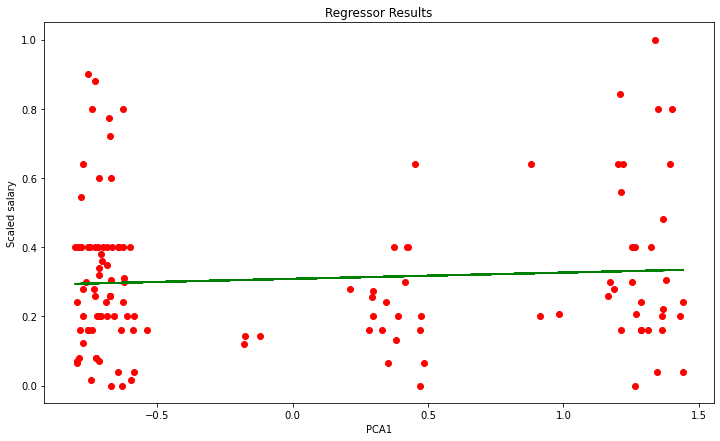

In [77]:
plt.figure(figsize=(12, 7))
plt.scatter(x=Xp2_train, y=Y2_train, color="red")
plt.plot(Xp2_train, regressor.predict(Xp2_train), color="green")
plt.title("Regressor Results")
plt.xlabel("PCA1")
plt.ylabel("Scaled salary")